In [1]:
%matplotlib inline
import warnings; warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import smog_code.kpp4py as kpp

In [2]:
from read_results import read_varnames
varnames = read_varnames("smog_code/smog_Parameters.f90")[0:12]
print(len(varnames), varnames)

12 ['HNO3', 'O', 'RH', 'RCOO2NO2', 'O3', 'HO2', 'RCOO2', 'RCHO', 'RO2', 'NO', 'NO2', 'OH']


# 0-th order

In [3]:
df_range = pd.read_csv('smog_range.csv', index_col=0)
df_range['mid'] = 0.5*(df_range['min']+df_range['max'])
df_range

,min,max,mid
HNO3,1.196871e-02,8.030713e-02,4.613792e-02
O,8.425274e-06,5.451626e-02,2.726234e-02
RH,1.850661e+00,1.977752e+00,1.914206e+00
RCOO2NO2,3.378443e-02,5.196239e-01,2.767042e-01
O3,4.626326e-02,1.750093e+00,8.981780e-01
HO2,9.376380e-07,2.617925e-01,1.308967e-01
RCOO2,4.809425e-07,2.341105e-02,1.170577e-02
RCHO,1.358315e+00,1.988463e+00,1.673389e+00
RO2,8.080372e-07,2.479889e-01,1.239949e-01
NO,5.853498e-09,1.661183e-01,8.305914e-02


In [4]:
f0 = kpp.onestep(df_range['mid'].T).T

# 1-st order

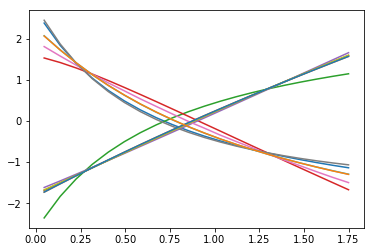

In [5]:
n = 4

y0_list = np.empty([20, 12])
y0_list[:] = df_range['mid'].values

y0_list[:,n] = np.linspace(df_range['min'][n],df_range['max'][n], 20)

f1 = kpp.onestep(y0_list.T).T
plt.plot(y0_list[:,n], StandardScaler().fit_transform(f1));

# Second order

In [6]:
i, j = 4, 7

In [7]:
y0_list = np.empty([20, 20, 12])
y0_list[:] = df_range['mid'].values

range_1d = lambda i: np.linspace(df_range['min'][i], df_range['max'][i], 20)
range_2d = lambda i, j: np.meshgrid(range_1d(i), range_1d(j))

y0_list[:,:,i] = range_2d(i, j)[0]
y0_list[:,:,j] = range_2d(i, j)[1]

f2 = kpp.onestep(y0_list.reshape(-1,12).T).T.reshape(20,20,12)

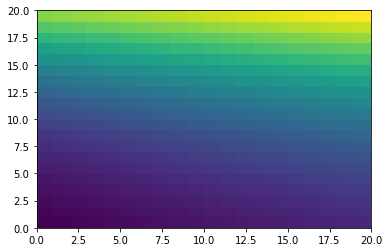

In [8]:
plt.pcolormesh(f2[..., 5])

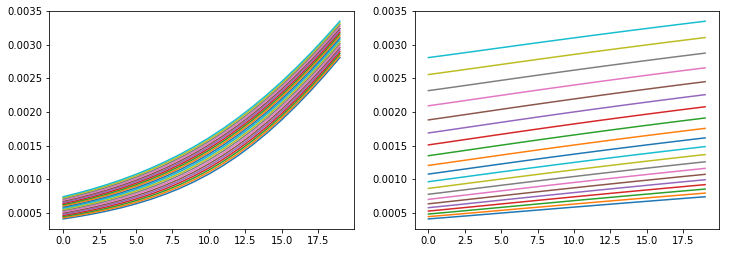

In [9]:
plt.figure(figsize=[12,4])
plt.subplot(121);plt.plot(f2[:, :, 5]);
plt.subplot(122);plt.plot(f2[:, :, 5].T);